<a href="https://colab.research.google.com/github/JHU-Kessler-Group/GraftedHybridLatexPaper/blob/main/Figure2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Getting Experimental Data from Github Repo

In [26]:
!rm -rf GraftedHybridLatexPaper
!git clone https://github.com/JHU-Kessler-Group/GraftedHybridLatexPaper.git

Cloning into 'GraftedHybridLatexPaper'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 66 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (66/66), 15.33 MiB | 19.09 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [ ]:
import pandas as pd
pu_0_0_df = pd.read_csv('/content/GraftedHybridLatexPaper/Data/Figure2a_Tensile_PU/PU_0_0.csv')
# display(pu_0_0_df.head())

### Smoothing the data with with EWM
 Time series data smoothing using Pandas's Exponential Weighted Moving (EWM) function.
$$
S_t = \alpha Y_t + (1 - \alpha) S_{t-1}
$$

 Alpha, is the smoothing factor, and varies from 0 to 1.  A larger alpha (closer to 1) gives more weight to recent data (less smoothing). A smaller alpha (closer to 0) gives more weight to older data (more smoothing).

 See https://www.youtube.com/watch?v=10GB16dTST8 for details.   

In [34]:
import numpy as np
alpha=0.1
noisy_data=pu_0_0_df
smoothed_data=noisy_data.ewm(alpha=alpha).mean()

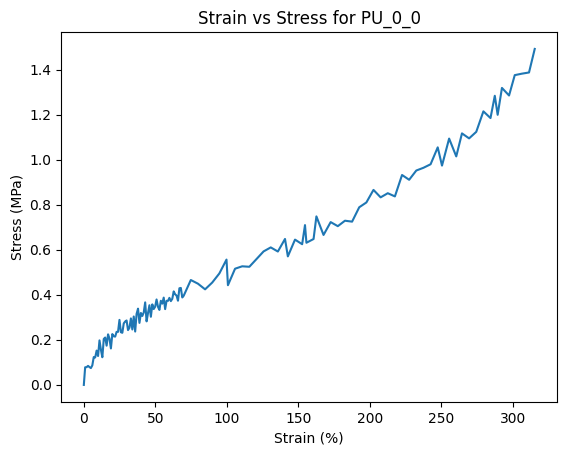

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=pu_0_0_df)
plt.xlabel('Strain (%)')
plt.ylabel('Stress (MPa)')
plt.title('Strain vs Stress for PU_0_0')
plt.show()

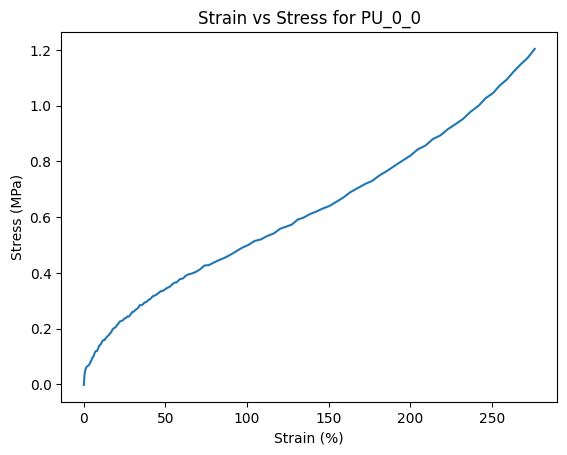

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=smoothed_data)
plt.xlabel('Strain (%)')
plt.ylabel('Stress (MPa)')
plt.title('Strain vs Stress for PU_0_0')
plt.show()

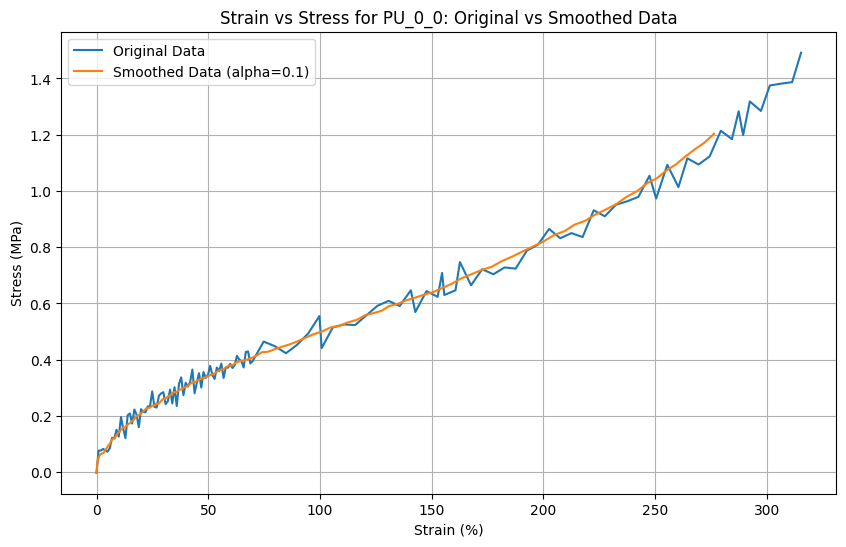

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a single plot
plt.figure(figsize=(10, 6)) # Optional: Adjust figure size

# Plot the original data
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=pu_0_0_df, label='Original Data')

# Plot the smoothed data
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=smoothed_data, label=f'Smoothed Data (alpha={alpha})')

plt.xlabel('Strain (%)')
plt.ylabel('Stress (MPa)')
plt.title('Strain vs Stress for PU_0_0: Original vs Smoothed Data')
plt.legend() # Show legend to distinguish the lines
plt.grid(True) # Optional: Add grid for better readability
plt.show()